In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('20220208_Final_result.csv')
raw_data.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000,1140,Good,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000,8370,Good,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000,1020,Good,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN


In [3]:
raw_data.shape

(14541, 20)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Immoweb ID            14541 non-null  int64  
 1   Property type         14541 non-null  object 
 2   property sub-type     14541 non-null  object 
 3   Price                 14541 non-null  object 
 4   Post code             14541 non-null  int64  
 5   Building condition    9615 non-null   object 
 6   Kitchen type          8587 non-null   object 
 7   Bedrooms              11778 non-null  float64
 8   Furnished             9337 non-null   object 
 9   Terrace surface       5000 non-null   float64
 10  Tenement building     13842 non-null  object 
 11  Number of frontages   9732 non-null   float64
 12  Swimming pool         4378 non-null   object 
 13  How many fireplaces?  871 non-null    float64
 14  Garden                1231 non-null   object 
 15  Terrace            

# Preprocessing

Remove nul price and change data type as float

In [5]:
raw_data = raw_data[pd.to_numeric(raw_data['Price'], errors='coerce').notnull()]
raw_data = raw_data.astype({"Price": float}, errors='raise')

Remove duplicate ID's

In [6]:
raw_data = raw_data.drop_duplicates(['Immoweb ID'], keep='last')

### Exploring the descriptive statistics of the variables

In [7]:
raw_data.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
count,1.389300e+04,13893,13893,1.389300e+04,13893.000000,9599,8575,11758.000000,9320,4992.000000,13573,9713.000000,4370,867.000000,1230,2798,6519.000000,11072.000000,2675.000000,2104
unique,NaN,2,20,NaN,NaN,6,8,NaN,2,NaN,2,NaN,2,NaN,1,1,NaN,NaN,NaN,8
top,NaN,HOUSE,VILLA,NaN,NaN,As new,Installed,NaN,No,NaN,No,NaN,No,NaN,Yes,Yes,NaN,NaN,NaN,South
freq,NaN,7699,2468,NaN,NaN,3789,4130,NaN,8730,NaN,10539,NaN,3833,NaN,1230,2798,NaN,NaN,NaN,646
mean,9.502801e+06,NaN,NaN,5.462355e+05,4694.370618,NaN,NaN,3.609117,NaN,35.219151,NaN,2.917533,NaN,1.173010,NaN,NaN,3095.344685,236.687681,1634.743925,NaN
std,3.458473e+05,NaN,NaN,6.817222e+05,3008.748453,NaN,NaN,3.663965,NaN,167.332801,NaN,0.939749,NaN,0.818414,NaN,NaN,16928.272185,314.187169,19659.610744,NaN
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,9.473314e+06,NaN,NaN,2.400000e+05,1930.000000,NaN,NaN,2.000000,NaN,11.000000,NaN,2.000000,NaN,1.000000,NaN,NaN,255.000000,102.000000,70.000000,NaN
50%,9.615558e+06,NaN,NaN,3.550000e+05,4000.000000,NaN,NaN,3.000000,NaN,20.000000,NaN,3.000000,NaN,1.000000,NaN,NaN,722.000000,170.000000,214.000000,NaN
75%,9.686662e+06,NaN,NaN,6.000000e+05,7866.000000,NaN,NaN,4.000000,NaN,40.000000,NaN,4.000000,NaN,1.000000,NaN,NaN,1683.500000,281.000000,801.000000,NaN


### Determining the variables of interest

As Fire places and Tenement building has so many missing values, we will drop these columns. We can apply the same for the Garden surface but instead of drop this column we will replace it with new feature (Region)

We also do not use Garden & Terrace surface. These columns will be drop after handeling missing values.

In [8]:
df = raw_data.drop(columns =['Tenement building', 'How many fireplaces?', 'Garden orientation'])

### Dealing with missing values

In [9]:
df.isnull().sum().sort_values(ascending=0)

Garden                 12663
Garden surface         11218
Terrace                11095
Swimming pool           9523
Terrace surface         8901
Surface of the plot     7374
Kitchen type            5318
Furnished               4573
Building condition      4294
Number of frontages     4180
Living area             2821
Bedrooms                2135
Property type              0
Post code                  0
Price                      0
property sub-type          0
Immoweb ID                 0
dtype: int64

#### Building Condition

In [10]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [11]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

#### Kitchen Type

In [12]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)
df["Kitchen type"] = df["Kitchen type"].fillna(0)

#### Furnished

Fill missing values

In [13]:
df['Furnished'] = df['Furnished'].fillna("No")
df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == "No" else 1)

#### Bedrooms

Fill missing values with 2 bedrooms

In [14]:
df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)

#### Swimming Pool

In [15]:
# Fill missing values with value 0
df['Swimming pool'].fillna(0, inplace = True)
df['Swimming pool'] = df['Swimming pool'].apply(lambda v: 0 if v == "No" else 1)
df['Swimming pool'].isnull().sum()

0

#### Surface of the plot

In [16]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

#### Living area

In [17]:
df.groupby('Property type')['Living area'].median()

Property type
APARTMENT    101.0
HOUSE        254.0
Name: Living area, dtype: float64

In [18]:
a = sorted(df['property sub-type'].unique())
b= df.groupby('property sub-type')['Living area'].median()
dict_sub_type_area = {}
for A, B in zip(a, b):
    dict_sub_type_area[A] = B
print(dict_sub_type_area)

{'APARTMENT_BLOCK': 260.0, 'BUNGALOW': 140.0, 'CASTLE': 998.0, 'CHALET': 65.0, 'COUNTRY_COTTAGE': 240.0, 'DUPLEX': 122.0, 'EXCEPTIONAL_PROPERTY': 340.0, 'FARMHOUSE': 295.5, 'FLAT_STUDIO': 37.0, 'GROUND_FLOOR': 95.0, 'KOT': 19.0, 'LOFT': 183.0, 'MANOR_HOUSE': 360.0, 'MANSION': 311.0, 'MIXED_USE_BUILDING': 250.0, 'PENTHOUSE': 126.0, 'SERVICE_FLAT': 65.0, 'TOWN_HOUSE': 168.0, 'TRIPLEX': 150.0, 'VILLA': 260.0}


In [19]:
df['Living area'].isnull().sum()

2821

In [20]:
"""
def fill_liv_area(col):
    
    if col['Living area'] > 0:
        return col['Living area']
        for key, value in dict_sub_type_area.items():
            if col['property sub-type'] == key:
                return value

df['Living area'] = df.apply(lambda col: fill_liv_area(col), axis=1)
"""

"\ndef fill_liv_area(col):\n    \n    if col['Living area'] > 0:\n        return col['Living area']\n        for key, value in dict_sub_type_area.items():\n            if col['property sub-type'] == key:\n                return value\n\ndf['Living area'] = df.apply(lambda col: fill_liv_area(col), axis=1)\n"

#### Fill missing values in Living area row

In [21]:
df_la_no_null = df.copy()

In [22]:
def fill_living_area(col):  
    if col['Living area'] > 0:
        return col['Living area']
    else: 
        if col['property sub-type'] == 'APARTMENT':
            return 118.0
        else:
            return 216.0


df_la_no_null['Living area'] = df_la_no_null.apply(lambda col: fill_living_area(col), axis=1)

#### Number of Frontages

In [23]:
df_la_no_null = df

In [24]:
#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)
mean_num_of_frontages

3.0

In [25]:
# fill mean value to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(mean_num_of_frontages)
# changing data type as int
df['Number of frontages'] = df['Number of frontages'].astype(int)

#### Garden/Garden Surface & Terrace/Surface

In [26]:
df['Garden'] = df['Garden'].fillna(df['Garden surface'].notnull())
def conv(value : str) -> int:
    if value == False: 
        return 0
    elif value == True:
        return 1
    else:
        return 1

df['Garden'] = df['Garden'].apply(conv)


In [27]:
df['Terrace'] = df['Terrace'].fillna(df['Terrace surface'].notnull())
df['Terrace'] = df['Terrace'].apply(conv)

In [28]:
# As it was mentioned before these columns will not be used for further analysis
df = df.drop(columns =['Garden surface', 'Terrace surface'])

### Creating new Columns

#### Price per m2

In [29]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)
df.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,3,1,0,1,0.0,63.0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2,1,0,1,0.0,150.0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,0,3,0,0,1,0.0,120.0,3158.33


In [30]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Immoweb ID,Immoweb ID,0.00000
Property type,Property type,0.00000
property sub-type,property sub-type,0.00000
Price,Price,0.00000
Post code,Post code,0.00000
Building condition,Building condition,0.00000
Kitchen type,Kitchen type,0.00000
Bedrooms,Bedrooms,0.00000
Furnished,Furnished,0.00000
Number of frontages,Number of frontages,0.00000


In [31]:
df.describe()

,Immoweb ID,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,1.389300e+04,1.389300e+04,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,11072.000000,11072.000000
mean,9.502801e+06,5.462355e+05,4694.370618,3.764342,0.769308,3.361837,0.042467,2.942345,0.724106,0.281077,0.560714,1452.425826,236.687681,2832.073639
std,3.458473e+05,6.817222e+05,3008.748453,1.636409,0.744092,3.420270,0.201660,0.786659,0.446980,0.449541,0.496318,11697.894538,314.187169,2775.293361
min,4.611027e+06,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.860000
25%,9.473314e+06,2.400000e+05,1930.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1785.710000
50%,9.615558e+06,3.550000e+05,4000.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,170.000000,2499.110000
75%,9.686662e+06,6.000000e+05,7866.000000,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1.000000,649.000000,281.000000,3362.500000
max,9.731707e+06,3.500000e+07,9992.000000,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,1.000000,1.000000,580608.000000,11000.000000,228500.000000


In [32]:
corr_df = df.drop(columns=['Immoweb ID', 'Post code']) 
corrMat= corr_df.corr().round(2)
corrMat

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
Price,1.00,0.12,0.09,0.34,-0.02,0.15,-0.01,0.06,0.07,0.29,0.52,0.23
Building condition,0.12,1.00,0.41,-0.00,0.09,0.02,-0.23,0.09,0.26,-0.00,-0.04,0.15
Kitchen type,0.09,0.41,1.00,0.00,0.03,0.06,-0.19,0.15,0.33,0.00,-0.04,0.10
Bedrooms,0.34,-0.00,0.00,1.00,-0.00,0.09,0.04,0.08,0.01,0.11,0.47,-0.09
Furnished,-0.02,0.09,0.03,-0.00,1.00,-0.07,-0.09,-0.03,0.00,-0.02,-0.05,0.11
Number of frontages,0.15,0.02,0.06,0.09,-0.07,1.00,0.09,0.14,0.07,0.13,0.15,-0.02
Swimming pool,-0.01,-0.23,-0.19,0.04,-0.09,0.09,1.00,-0.10,-0.14,0.03,0.07,-0.11
Garden,0.06,0.09,0.15,0.08,-0.03,0.14,-0.10,1.00,0.16,0.01,0.06,-0.05
Terrace,0.07,0.26,0.33,0.01,0.00,0.07,-0.14,0.16,1.00,-0.01,-0.05,0.07
Surface of the plot,0.29,-0.00,0.00,0.11,-0.02,0.13,0.03,0.01,-0.01,1.00,0.21,0.03


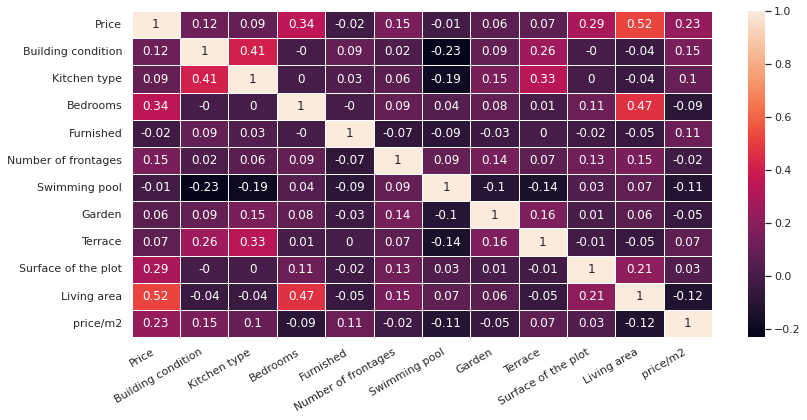

In [33]:
plt.figure(figsize=(13, 6))
sns.heatmap(corrMat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### Dealing with Outliers

#### Price

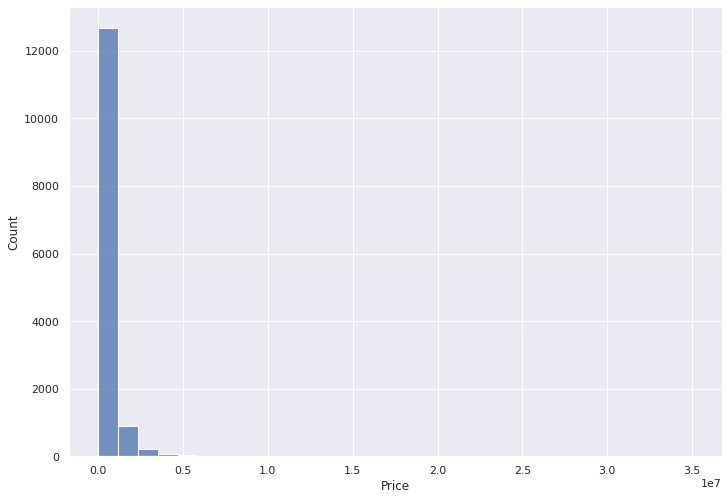

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['Price'], bins=30);

In [35]:
# This variable is equal to the 99th percentile of the 'Price' variable
q = df['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df[df['Price']<q]
# In this way we have removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,1.375100e+04,13751,13751,1.375100e+04,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,10960.000000,10960.000000
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,HOUSE,VILLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7572,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.504520e+06,NaN,NaN,5.037515e+05,4705.970548,3.757545,0.768671,3.297724,0.042470,2.936805,0.724238,0.281216,0.559450,1158.464548,228.759854,2792.314433
std,3.430954e+05,NaN,NaN,4.461930e+05,3006.751236,1.634351,0.742631,2.977993,0.201665,0.777131,0.446914,0.449609,0.496471,7166.296102,290.409990,2707.811209
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.860000
25%,9.475254e+06,NaN,NaN,2.400000e+05,1933.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1779.580000
50%,9.616501e+06,NaN,NaN,3.500000e+05,4000.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,168.000000,2489.470000
75%,9.686911e+06,NaN,NaN,5.950000e+05,7870.000000,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1.000000,633.000000,279.000000,3333.330000


/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


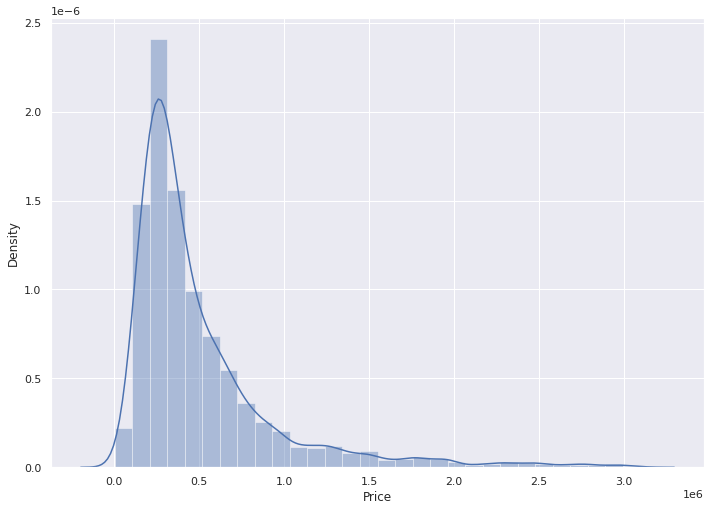

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_1['Price'], bins=30)
plt.show()

#### Living area

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Living area', ylabel='Density'>

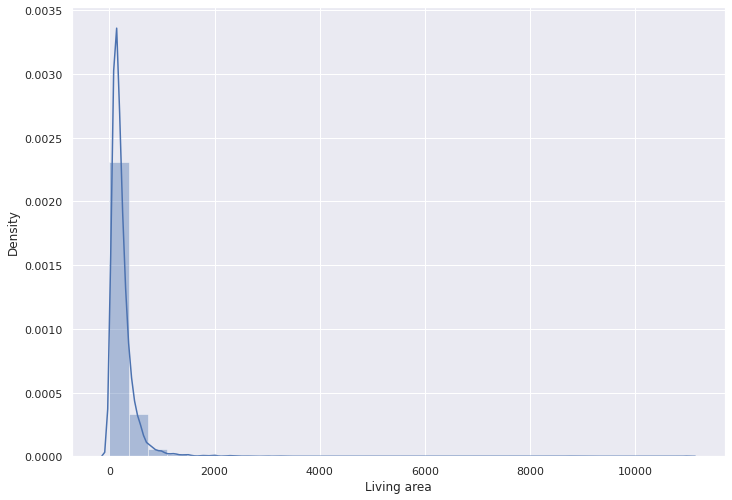

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Living area'], bins=30)

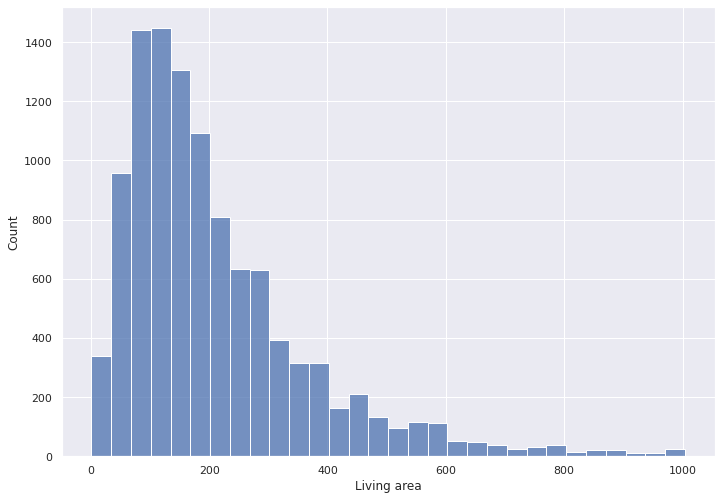

In [38]:
q = data_1['Living area'].quantile(0.99)
data_2 = data_1[data_1['Living area']< q]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data_2['Living area'], bins=30);

#### Surface of the plot

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


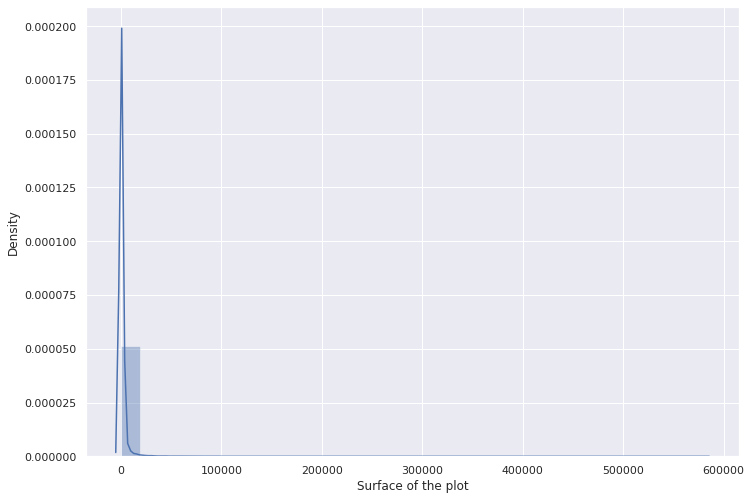

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Surface of the plot'], bins=30);

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


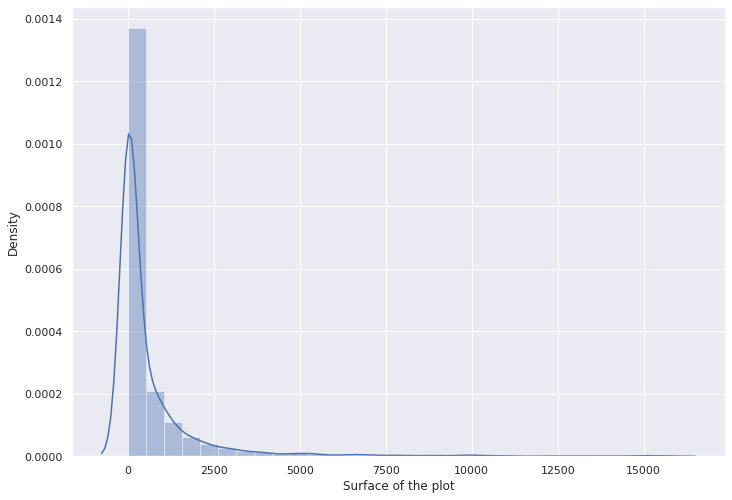

In [40]:
q = data_2['Surface of the plot'].quantile(0.99)
data_3 = data_2[data_2['Surface of the plot']< q]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_3['Surface of the plot'], bins=30);

#### Number of frontages

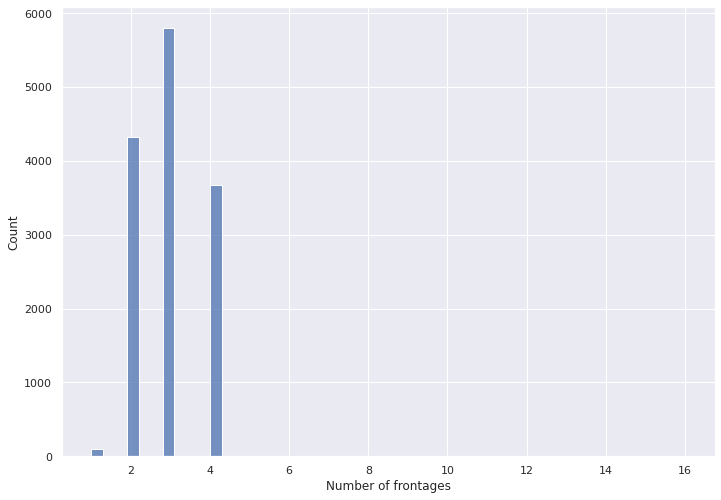

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['Number of frontages'], bins=50);

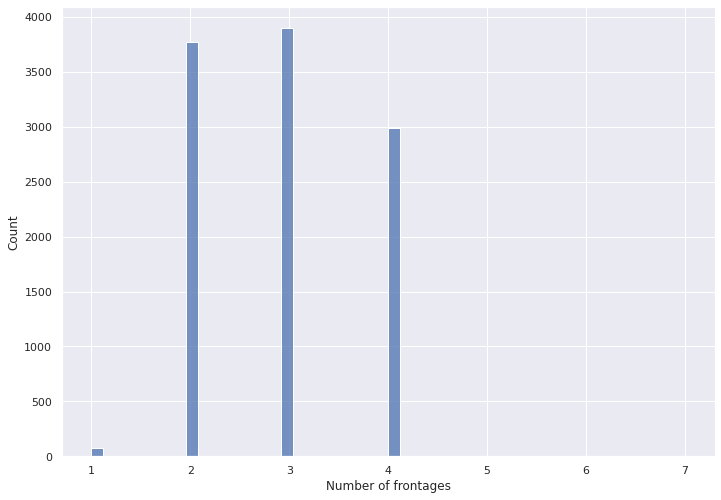

In [42]:
q = data_3['Number of frontages'].quantile(0.99)
data_4 = data_3[data_3['Number of frontages']< q]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data_3['Number of frontages'], bins=50);

#### Bedrooms

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


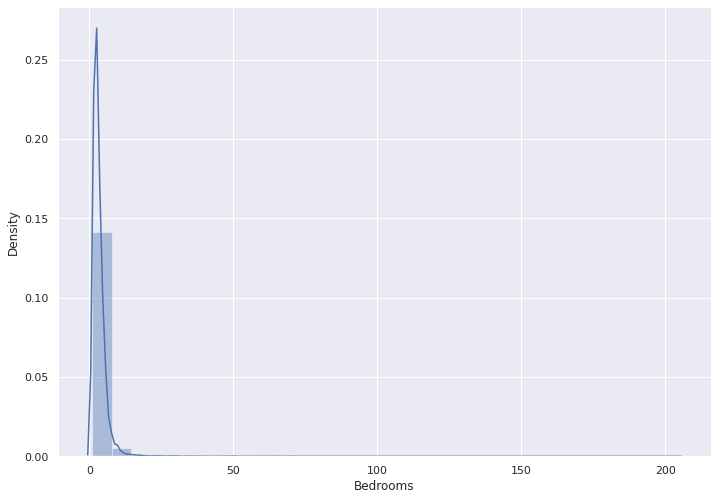

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Bedrooms'], bins=30);

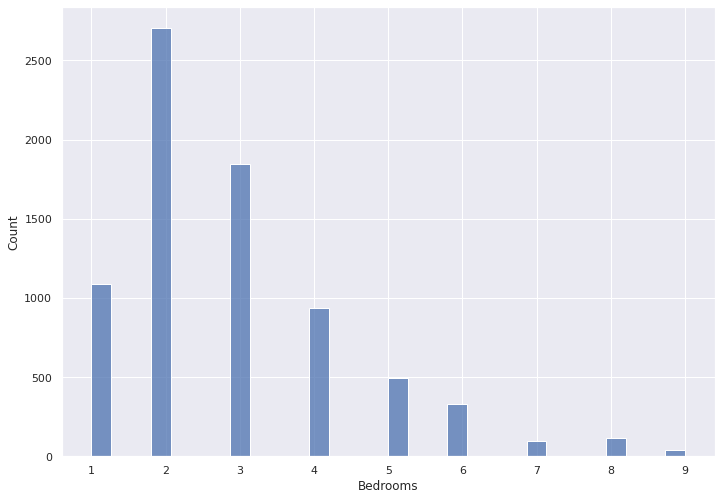

In [44]:
q = data_4['Bedrooms'].quantile(0.99)
data_5 = data_4[data_4['Bedrooms']< q]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data_5['Bedrooms'],bins=30);

In [45]:
data_cleaned = data_5.reset_index(drop=True)
data_cleaned.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,7.642000e+03,7642,7642,7.642000e+03,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,APARTMENT,DUPLEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4358,1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.522129e+06,NaN,NaN,4.410351e+05,4449.048286,3.961659,0.851479,2.900026,0.053258,2.494897,0.656896,0.271657,0.622743,251.186993,179.776367,2890.644092
std,3.068400e+05,NaN,NaN,3.768716e+05,3069.009736,1.621402,0.738071,1.564460,0.224563,0.520274,0.474777,0.444843,0.484732,935.353973,137.785364,1753.774765
min,4.611027e+06,NaN,NaN,1.000000e+04,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,65.360000
25%,9.487963e+06,NaN,NaN,2.280000e+05,1650.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,90.000000,1824.572500
50%,9.620074e+06,NaN,NaN,3.250000e+05,3500.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,140.000000,2587.085000
75%,9.688266e+06,NaN,NaN,5.250000e+05,8000.000000,6.000000,1.000000,4.000000,0.000000,3.000000,1.000000,1.000000,1.000000,170.000000,230.000000,3475.610000


In [46]:
axis_name = ['Building condition',
 'Kitchen type',
 'Bedrooms',
 'Number of frontages',
 'Surface of the plot',
 'Living area']

Text(0.5, 1.0, 'Price and Surface of the plot')

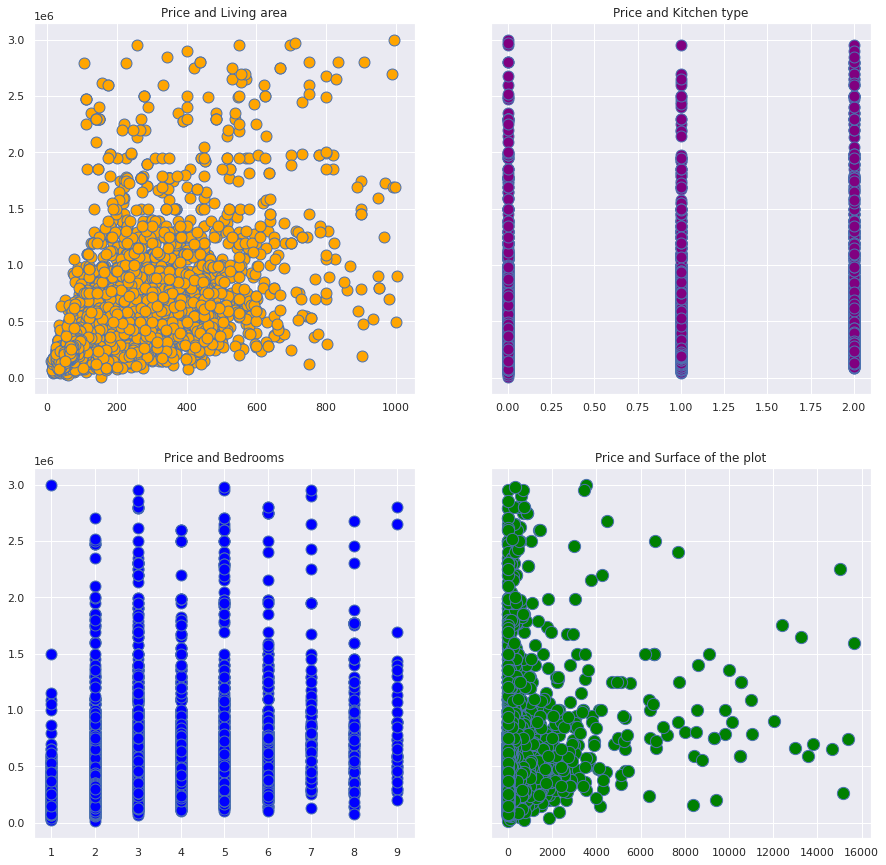

In [47]:
f, axs = plt.subplots(2, 2, sharey=True, figsize =(15,15)) #sharey -> share 'Price' as y
axs[0, 0].scatter(data_cleaned['Living area'],data_cleaned['Price'], color = 'orange', edgecolor = 'b', s = 120)
axs[0, 0].set_title('Price and Living area')
axs[0, 1].scatter(data_cleaned['Kitchen type'],data_cleaned['Price'], color = 'purple', edgecolor = 'b', s = 120)
axs[0, 1].set_title('Price and Kitchen type')
axs[1, 0].scatter(data_cleaned['Bedrooms'],data_cleaned['Price'], color = 'blue', edgecolor = 'b', s = 120)
axs[1, 0].set_title('Price and Bedrooms')
axs[1, 1].scatter(data_cleaned['Surface of the plot'],data_cleaned['Price'], color = 'green', edgecolor = 'b', s = 150)
axs[1, 1].set_title('Price and Surface of the plot')



### Multicolineratiy

In [48]:
data_cleaned.columns.values

array(['Immoweb ID', 'Property type', 'property sub-type', 'Price',
       'Post code', 'Building condition', 'Kitchen type', 'Bedrooms',
       'Furnished', 'Number of frontages', 'Swimming pool', 'Garden',
       'Terrace', 'Surface of the plot', 'Living area', 'price/m2'],
      dtype=object)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Building condition', 'Kitchen type', 'Bedrooms',
       'Furnished', 'Number of frontages', 'Swimming pool', 'Garden',
       'Terrace', 'Surface of the plot', 'Living area']]
vif = pd.DataFrame() 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [50]:
vif

,VIF,Features
0,7.225714,Building condition
1,2.771059,Kitchen type
2,6.941256,Bedrooms
3,1.083951,Furnished
4,9.924882,Number of frontages
5,2.869116,Swimming pool
6,1.451282,Garden
7,2.753614,Terrace
8,1.239052,Surface of the plot
9,4.850121,Living area


In [51]:
data_no_multicollinearity = data_cleaned.drop(['Number of frontages', 'Building condition'],axis=1)
data_no_multicollinearity

,Immoweb ID,Property type,property sub-type,Price,Post code,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,1.0,1,1,1,0,1,0.0,63.0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,1.0,1,1,1,0,1,0.0,42.0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,1.0,1,1,1,0,1,0.0,42.0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,1.0,3,1,1,0,1,0.0,150.0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,2.0,2,0,0,0,1,0.0,120.0,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7995366,APARTMENT,SERVICE_FLAT,242000.0,2880,2.0,1,0,1,0,1,0.0,62.0,3903.23
7638,9540791,APARTMENT,SERVICE_FLAT,369000.0,8400,0.0,1,0,1,0,1,0.0,55.0,6709.09
7639,8041977,APARTMENT,SERVICE_FLAT,217000.0,9880,0.0,1,0,1,0,1,0.0,65.0,3338.46
7640,9459825,APARTMENT,SERVICE_FLAT,148500.0,9990,0.0,1,0,1,0,0,0.0,52.0,2855.77


### Categorical data encoding

In [52]:
data_no_multicollinearity['Post code'].astype(str)

0       1140
1       8370
2       8370
3       8370
4       1020
        ... 
7637    2880
7638    8400
7639    9880
7640    9990
7641    3500
Name: Post code, Length: 7642, dtype: object

In [53]:
post_code_stat = data_no_multicollinearity['Post code'].value_counts(ascending=False)
post_code_stat

1000    189
1050    182
2000    164
1070    139
8300    139
       ... 
9981      1
9473      1
4480      1
4530      1
6210      1
Name: Post code, Length: 734, dtype: int64

In [54]:

print('Total no of Poste code where data points are more than 10 = %s' % (len(post_code_stat[post_code_stat > 10])))
print('Total no of Poste code where data points are less than 10 = %s' % (len(post_code_stat[post_code_stat <= 10])))

Total no of Poste code where data points are more than 10 = 167
Total no of Poste code where data points are less than 10 = 567


In [55]:
pc_stat_less_10 = post_code_stat[post_code_stat <= 10]
data_post_code = data_no_multicollinearity.copy()
data_post_code['Post code'] = data_no_multicollinearity['Post code'].apply(lambda x: 'other' if x in pc_stat_less_10 else x )
len(data_post_code['Post code'].unique())

168

In [56]:
data_no_pro_type = data_post_code.drop(columns=['Immoweb ID', 'Property type', 'price/m2'])

In [57]:

data_with_dummies = pd.get_dummies(data_no_pro_type, drop_first=True)

In [58]:
data_with_dummies.head()

,Price,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,Living area,property sub-type_BUNGALOW,...,Post code_9550,Post code_9600,Post code_9620,Post code_9700,Post code_9800,Post code_9820,Post code_9880,Post code_9900,Post code_9940,Post code_other
0,179000.0,1.0,1,1,1,0,1,0.0,63.0,0,...,0,0,0,0,0,0,0,0,0,0
1,255000.0,1.0,1,1,1,0,1,0.0,42.0,0,...,0,0,0,0,0,0,0,0,0,0
2,255000.0,1.0,1,1,1,0,1,0.0,42.0,0,...,0,0,0,0,0,0,0,0,0,0
3,620000.0,1.0,3,1,1,0,1,0.0,150.0,0,...,0,0,0,0,0,0,0,0,0,0
4,379000.0,2.0,2,0,0,0,1,0.0,120.0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data_with_dummies.columns.values

array(['Price', 'Kitchen type', 'Bedrooms', 'Furnished', 'Swimming pool',
       'Garden', 'Terrace', 'Surface of the plot', 'Living area',
       'property sub-type_BUNGALOW', 'property sub-type_CASTLE',
       'property sub-type_CHALET', 'property sub-type_COUNTRY_COTTAGE',
       'property sub-type_DUPLEX',
       'property sub-type_EXCEPTIONAL_PROPERTY',
       'property sub-type_FARMHOUSE', 'property sub-type_FLAT_STUDIO',
       'property sub-type_GROUND_FLOOR', 'property sub-type_KOT',
       'property sub-type_LOFT', 'property sub-type_MANOR_HOUSE',
       'property sub-type_MANSION',
       'property sub-type_MIXED_USE_BUILDING',
       'property sub-type_PENTHOUSE', 'property sub-type_SERVICE_FLAT',
       'property sub-type_TOWN_HOUSE', 'property sub-type_TRIPLEX',
       'property sub-type_VILLA', 'Post code_1020', 'Post code_1030',
       'Post code_1040', 'Post code_1050', 'Post code_1060',
       'Post code_1070', 'Post code_1080', 'Post code_1081',
       'Post code_108

In [60]:
df_reg = data_with_dummies.copy()

## Linear Regression Model

Declare the features and targets

In [61]:
X = df_reg.drop(['Price'], axis =1)
y = df_reg['Price']

In [62]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (7642, 194)
Shape of y:  (7642,)


### Splitting the data set

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [64]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6113, 194)
Shape of X_test:  (1529, 194)
Shape of y_train:  (6113,)
Shape of y_test:  (1529,)


### Standardization and Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X_train)

StandardScaler()

In [66]:
features_scal = scaler.transform(X_train)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.6405679972753207

In [68]:
y_hat = regressor.predict(X_train)

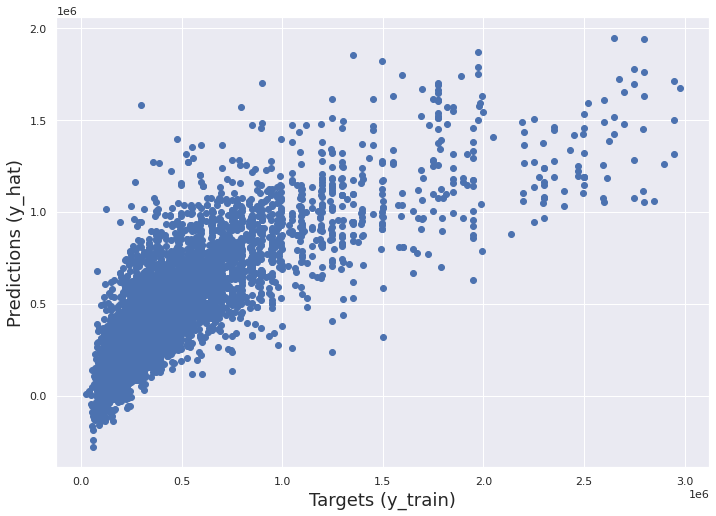

In [69]:
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

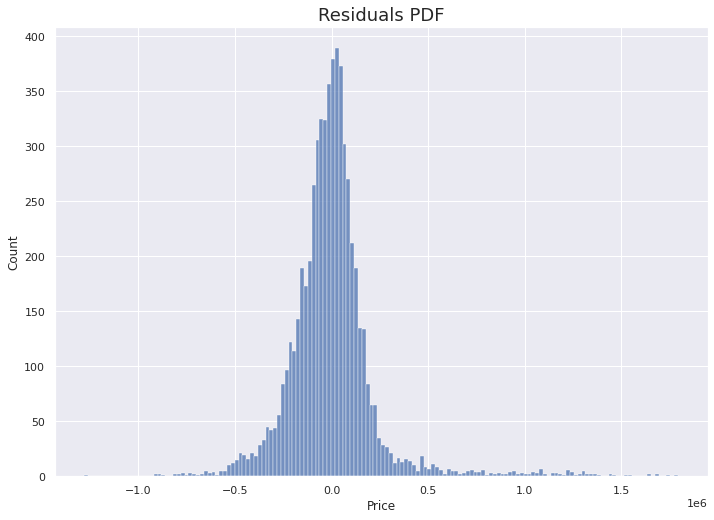

In [70]:
# We can plot the PDF(Probability density function) of the residuals and check for anomalies
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [71]:
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X_test)

StandardScaler()

In [72]:
regressor.score(X_test, y_test)

0.5772551689007914

In [73]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

y_hat = regressor.predict(X_train)
rmse = (np.sqrt(MSE(y_train, y_hat)))
r2 = r2_score(y_train, y_hat)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(MSE(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 231169.90335369692
R2 score is 0.6405679972753207


The model performance for testing set
--------------------------------------
RMSE is 220416.49320061336
R2 score is 0.5772551689007914


In [74]:
regressor.coef_

array([ 2.83302433e+04,  2.09823639e+04,  2.22682084e+04, -2.40032057e+04,
        1.38129762e+04,  3.31321798e+04,  2.03014782e+01,  1.54986864e+03,
        5.54181948e+04, -4.09797739e+05, -1.51707842e+04, -6.86892349e+04,
        3.93661407e+04,  1.07786436e+05, -1.15903255e+05, -1.00895733e+05,
        3.80308562e+04, -1.53234494e+05,  5.28332832e+04,  8.18120481e+03,
        6.16206939e+04, -4.85931958e+04,  1.98906019e+05,  4.05557374e+04,
       -8.47551526e+03,  1.16634213e+04,  1.34073138e+05, -2.35967556e+05,
       -1.69336190e+05,  4.09109825e+04,  1.69952271e+05, -4.50186409e+04,
       -1.89701137e+05, -2.62583767e+05, -2.13559467e+05, -1.75877370e+05,
       -1.04804890e+05, -1.84814957e+05, -2.06592089e+05, -1.88332382e+05,
        3.10509259e+04, -6.66327150e+04,  9.68089615e+04, -6.70042243e+04,
       -9.46527980e+04, -2.06129832e+05, -2.29442735e+05, -1.48847986e+05,
       -1.44891518e+05, -8.07296185e+04, -2.59132484e+05, -2.63859754e+05,
       -1.97040358e+05, -

In [75]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = regressor.coef_
reg_summary

,Features,Weights
0,Kitchen type,28330.243275
1,Bedrooms,20982.363921
2,Furnished,22268.208439
3,Swimming pool,-24003.205659
4,Garden,13812.976214
...,...,...
189,Post code_9820,-178701.921658
190,Post code_9880,-149520.829194
191,Post code_9900,-392697.521221
192,Post code_9940,-222084.625225


In [76]:
y_hat_test = regressor.predict(X_test)

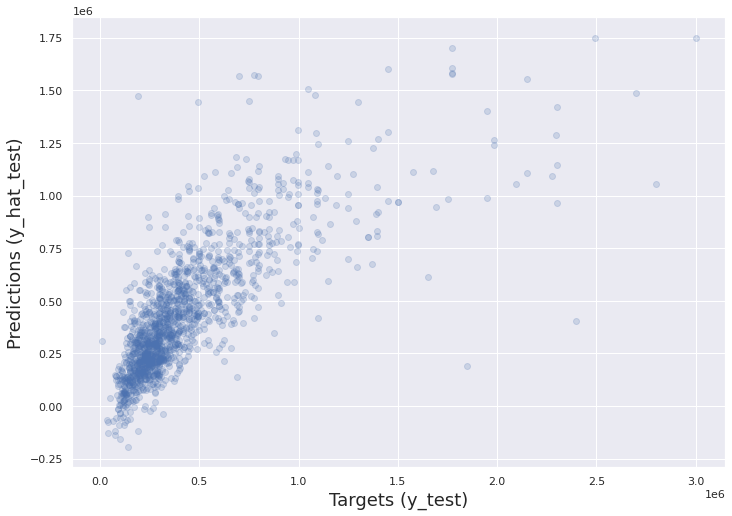

In [77]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [78]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(MSE(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(MSE(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))